In [1]:
import tensorflow as tf
import os
# os.chdir('C:\Upwork\Image_classifier')

In [2]:
import cv2
import imghdr

C:\Users\Ali\AppData\Local\Temp\ipykernel_964\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
data_dir = 'data'

In [4]:
image_exts = ['jpg', 'jpeg', 'png', 'bmp']

In [5]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        img = cv2.imread(image_path)
        try:
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'image not in ext{image_path}')
                os.remove(image_path)
        except:
            print(f'issue with image: {image_path}')
            # os.remove(image_path)
            


In [6]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 502 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

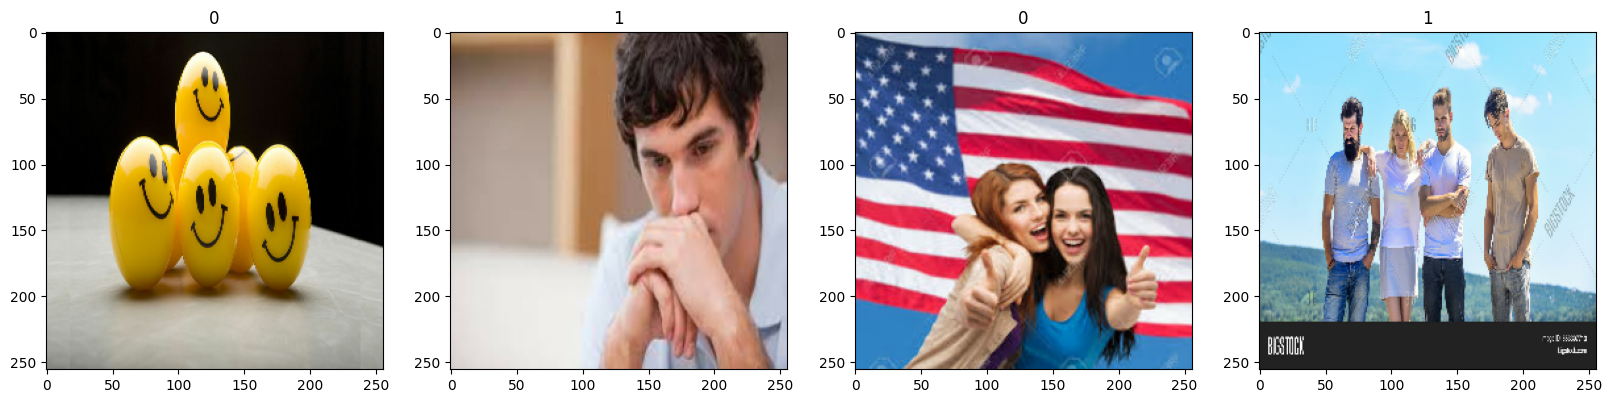

In [11]:
fig, ax = plt.subplots(ncols=4, figsize = (20, 20))
for idx, image in enumerate(batch[0][:4]):
    ax[idx].imshow(image.astype(int))
    ax[idx].set_title(batch[1][idx])

# sad=1

In [12]:
data = data.map(lambda x, y: (x/255, y))

In [13]:
scaled_batch = data.as_numpy_iterator().next()

In [14]:
scaled_batch[0].min()

0.0

In [15]:
len(data)

16

In [16]:
train_size = int(0.7 * len(data))
val_size = int(0.2 * len(data))
test_size = int(0.1 * len(data))+1

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [23]:
logdir = 'logs'

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15


11/11 [==============================] - 16s 1s/step - loss: 0.7489 - accuracy: 0.4972 - val_loss: 0.6110 - val_accuracy: 0.6354
Epoch 2/15
11/11 [==============================] - 12s 969ms/step - loss: 0.5793 - accuracy: 0.7074 - val_loss: 0.6804 - val_accuracy: 0.5938
Epoch 3/15
11/11 [==============================] - 13s 1s/step - loss: 0.5664 - accuracy: 0.6989 - val_loss: 0.5420 - val_accuracy: 0.8750
Epoch 4/15
11/11 [==============================] - 12s 984ms/step - loss: 0.4084 - accuracy: 0.8494 - val_loss: 0.4399 - val_accuracy: 0.8229
Epoch 5/15
11/11 [==============================] - 12s 969ms/step - loss: 0.2897 - accuracy: 0.8920 - val_loss: 0.2116 - val_accuracy: 0.9583
Epoch 6/15
11/11 [==============================] - 12s 996ms/step - loss: 0.2340 - accuracy: 0.9233 - val_loss: 0.1721 - val_accuracy: 0.9375
Epoch 7/15
11/11 [==============================] - 12s 942ms/step - loss: 0.1525 - accuracy: 0.9545 - val_loss: 0.1126 - val_accuracy: 0.9688
Epo

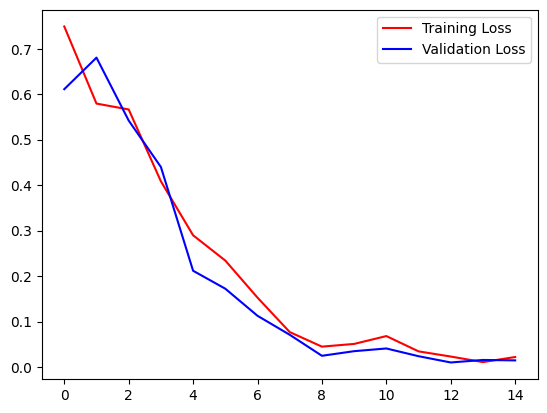

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='red', label='Training Loss')
plt.plot(hist.history['val_loss'],color='blue', label='Validation Loss')
plt.legend()
plt.show()

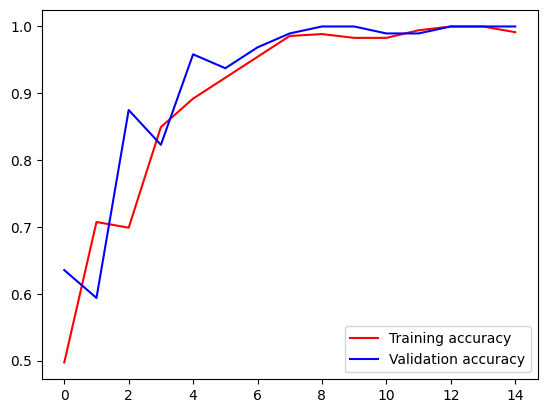

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='red', label='Training accuracy')
plt.plot(hist.history['val_accuracy'],color='blue', label='Validation accuracy')
plt.legend()
plt.show()

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 145ms/step


In [32]:
print(f'precision: {precision.result().numpy()}')
print(f'recall: {recall.result().numpy()}')
print(f'accuracy: {accuracy.result().numpy()}')

precision: 1.0
recall: 1.0
accuracy: 1.0


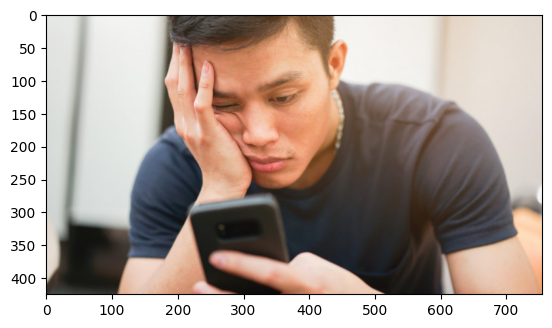

In [42]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

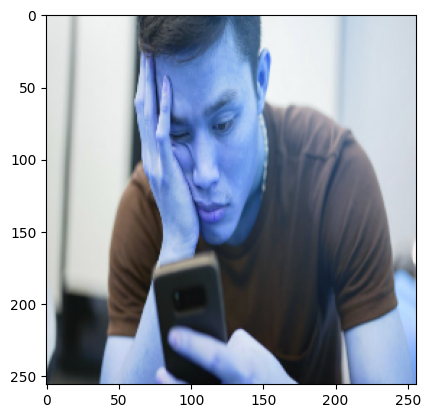

In [43]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [44]:
yhat = model.predict(np.expand_dims(resize/255, axis=0))

1/1 [==============================] - 0s 66ms/step


In [45]:
if yhat[0][0] > 0.5:
    print('sad')
else:
    print('happy')

sad


In [46]:
from tensorflow.keras.models import load_model

In [47]:
model.save(os.path.join('models', 'happysad_image_classifier.h5'))

c:\Upwork\Image_classifier\ImCls\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
new_model = load_model(os.path.join('models', 'happysad_image_classifier.h5'))

In [50]:
new_model.predict(np.expand_dims(resize/255, axis=0))
if yhat[0][0] > 0.5:
    print('sad')
else:
    print('happy')

1/1 [==============================] - 0s 57ms/step
sad
